# Problem Statement:
    To predict whether Income of a person lies in the category of "<=50K" or ">50k" by training the model with the given columns of information.

## Introduction to Dataset

    - This dataset was extracted by Barry Becker from 1994 US Census Database.
    - This dataset consists of anonymous information such as age,occupation,education,race,work class,native_country, capital gain and loss and census income of two categories i.e, ">50K" or "<=50K" 

## Variables Description:
    -Age: Age of Individual 
    -Work_class: Work category of Individual Adult
    -fnlwgt: final weight
    -Education: Highest Educational qualification of each Individual Adult
    -Education_num: Education number wrt to their Educational qualification
    -Marital_Status: Marital Status of Individual Adult
    -Occupation: Each Individual Adult's Occupation
    -Relationship: Each Adult's Relation in their family
    -Race: Race of Individual Adult
    -Sex: Female, Male(Gender)
    -Capital_gain: Capital gain of Individual Adult
    -Capital_loss: Capital loss of Individual Adult
    -Hours_per_Week: Individual Adult's Working hours per week
    -Native_Country: Individual's Native Country
    -Census_Income: Annual Income of each Individual(<=50K or >50K)

##### Business Understanding
As per my business understanding, this dataset is about categorizing Adult's Annual Income either <=50K or >50K based on some features.
Features that may affect the annual income are Age, Education, Occupation, Hours_per_Week and Marital_Status

# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

## Loading Train and Test dataset

In [2]:
# column names of the dataset
columns = ['Age','Work_class','fnlwgt','Education','Education_num','Marital_Status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_Week','Native_Country','Census_Income']

In [3]:
train_data = pd.read_csv('D:\\Project\\adult-training.csv',header=None,names=columns)
test_data = pd.read_csv('D:\\Project\\adult-test.csv',names=columns)

In [4]:
train_data

,Age,Work_class,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_data

,Age,Work_class,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [6]:
# removing 1st row of test_data, since it is a miscellinious data
test_data.drop(index=0,axis=0,inplace=True)

In [7]:
test_data

,Age,Work_class,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [8]:
train_data.shape,test_data.shape

((32561, 15), (16281, 15))

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work_class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Census_Income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
test_data['Age']=test_data['Age'].astype('int64')

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             16281 non-null  int64  
 1   Work_class      16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   Education       16281 non-null  object 
 4   Education_num   16281 non-null  float64
 5   Marital_Status  16281 non-null  object 
 6   Occupation      16281 non-null  object 
 7   Relationship    16281 non-null  object 
 8   Race            16281 non-null  object 
 9   Sex             16281 non-null  object 
 10  Capital_gain    16281 non-null  float64
 11  Capital_loss    16281 non-null  float64
 12  Hours_per_Week  16281 non-null  float64
 13  Native_Country  16281 non-null  object 
 14  Census_Income   16281 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 2.0+ MB


From above info we can classify categorical and continuous variables.

Categorical variables: Work_class, Education, Marital_Status, Occupation, Relationship, Race, Gender, Native_Country, Census_Income.

Continuous variable: Age, fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_Week.    

In [12]:
train_data.describe()

,Age,fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From this we can get some information about continuous variables like mean,std,quartile values, min,max values. We can use this at the time of analysis.

### Handling Missing Values

In our dataset, we can observe that there are some values as ' ?'. So we can consider them as null values and replace ' ?' with np.NaN and further handle them column wise.

In [13]:
train_data.replace(' ?',np.NaN,inplace=True)
test_data.replace(' ?',np.NaN,inplace=True)

In [14]:
train_data.isnull().sum()

Age                  0
Work_class        1836
fnlwgt               0
Education            0
Education_num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_Week       0
Native_Country     583
Census_Income        0
dtype: int64

In [15]:
test_data.isnull().sum()

Age                 0
Work_class        963
fnlwgt              0
Education           0
Education_num       0
Marital_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_gain        0
Capital_loss        0
Hours_per_Week      0
Native_Country    274
Census_Income       0
dtype: int64

In [16]:
train_data['Work_class'].value_counts(),test_data['Work_class'].value_counts()

( Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  State-gov            1298
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: Work_class, dtype: int64,
  Private             11210
  Self-emp-not-inc     1321
  Local-gov            1043
  State-gov             683
  Self-emp-inc          579
  Federal-gov           472
  Without-pay             7
  Never-worked            3
 Name: Work_class, dtype: int64)

In [17]:
train_data['Occupation'].value_counts(),test_data['Occupation'].value_counts()

( Prof-specialty       4140
  Craft-repair         4099
  Exec-managerial      4066
  Adm-clerical         3770
  Sales                3650
  Other-service        3295
  Machine-op-inspct    2002
  Transport-moving     1597
  Handlers-cleaners    1370
  Farming-fishing       994
  Tech-support          928
  Protective-serv       649
  Priv-house-serv       149
  Armed-Forces            9
 Name: Occupation, dtype: int64,
  Prof-specialty       2032
  Exec-managerial      2020
  Craft-repair         2013
  Sales                1854
  Adm-clerical         1841
  Other-service        1628
  Machine-op-inspct    1020
  Transport-moving      758
  Handlers-cleaners     702
  Tech-support          518
  Farming-fishing       496
  Protective-serv       334
  Priv-house-serv        93
  Armed-Forces            6
 Name: Occupation, dtype: int64)

    Here we can observe that missing values in Work_class and Occupation are more in number dominating other class variables. If we replace them their respective mode class, it also increases the dominace of most frequent classes. So, to avoid this issue, we replace the missing values with a new variable 'Other', so that, dominace of variables would be avoided. 

In [18]:
train_data['Work_class'].fillna(' Other',inplace=True)

In [19]:
test_data['Work_class'].fillna(' Other',inplace=True)

In [20]:
train_data['Occupation'].fillna(' Other',inplace=True)

In [21]:
test_data['Occupation'].fillna(' Other',inplace=True)

In [22]:
train_data['Work_class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 Other                1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work_class, dtype: int64

In [23]:
train_data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Other                1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [24]:
train_data[train_data['Native_Country'].isnull()]

,Age,Work_class,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,Other,293936,7th-8th,4,Married-spouse-absent,Other,Not-in-family,White,Male,0,0,40,NaN,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


We can observe that there is no relation b/w Country missing values with other variables. So we can consider them as MCAR(Missing Completely AT Random). So we can replace them with any mean of central tendency values. 

In [25]:
train_data['Native_Country'].mode()[0]

' United-States'

In [26]:
train_data['Native_Country'].fillna(train_data['Native_Country'].mode()[0],inplace=True)

In [27]:
test_data['Native_Country'].fillna(test_data['Native_Country'].mode()[0],inplace=True)

In [28]:
train_data.isnull().any()

Age               False
Work_class        False
fnlwgt            False
Education         False
Education_num     False
Marital_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_Week    False
Native_Country    False
Census_Income     False
dtype: bool

In [29]:
test_data.isnull().any()

Age               False
Work_class        False
fnlwgt            False
Education         False
Education_num     False
Marital_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_Week    False
Native_Country    False
Census_Income     False
dtype: bool

Completed with handling missing values.

For easy convinience, here I'm combining both train data and test data with a extra column, which further helps us to differentiate them. We opt this method, to ensure that there won't be any difference in train and test data at the time of predicting our model.

In [30]:
train_data['new'] = 1

In [31]:
test_data['new'] = 0

In [32]:
data = pd.concat([train_data,test_data])

In [33]:
data

,Age,Work_class,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income,new
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,1
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,1
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,1
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.,0
16278,64,Other,321403.0,HS-grad,9.0,Widowed,Other,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.,0
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,0
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.,0


Here we can observe on thing that, since we did not mention any axis while concatinating the datasets. So, by default they got concatinated row wise. 

And we can differentiate that, all rows with having value of 1 in column new belongs to train_data and rest of them belongs to test_data.

We can now perform remaining preprocessing techniques for the combined data.

## Handling Outliers

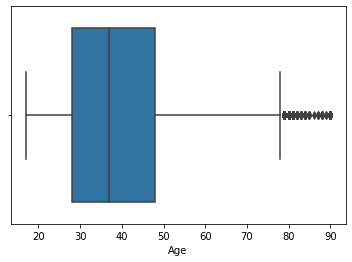

In [34]:
sns.boxplot(data['Age'])

Here we used boxplot from seaborn library to visualise outliers. We now handle them using Inter Quatile Range.

In [35]:
data['Age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

In [36]:
# first quartile value
q1_age=data['Age'].describe()['25%']

In [37]:
# third quartile value
q3_age=data['Age'].describe()['75%']

In [38]:
# value of iqr
iqr_age=q3_age-q1_age

We observe from the above boxplot that the ouliers are towards the upper boundry and we handle them by replacing with the upper boundary using dictionary.

In [39]:
# upper boundary
ub_age = q3_age+(1.5*iqr_age)

In [40]:
# any values grater than the upper boundary are treated as outliers
outliers_age=data[data['Age'] > ub_age]['Age']

In [41]:
outliers_age

74       79
222      90
430      80
918      81
1040     90
         ..
15964    80
16004    80
16107    83
16149    79
16252    81
Name: Age, Length: 216, dtype: int64

In [42]:
d={}
d=d.fromkeys(outliers_age,ub_age)

In [43]:
# replacing all outliers with upper boundary
d

{79: 78.0,
 90: 78.0,
 80: 78.0,
 81: 78.0,
 88: 78.0,
 82: 78.0,
 83: 78.0,
 84: 78.0,
 85: 78.0,
 86: 78.0,
 87: 78.0,
 89: 78.0}

In [44]:
data['Age'].replace(d,inplace=True)

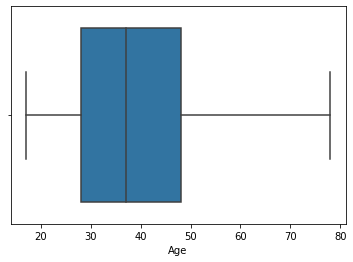

In [45]:
sns.boxplot(data['Age'])

In [46]:
data['Age'].describe()

count    48842.000000
mean        38.618566
std         13.630359
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         78.000000
Name: Age, dtype: float64

We can also observe that there is no much difference in mean and std b/w 'Age' before and after handling outliers

In the same way, we find out and handle outliers in remaining numerical columns

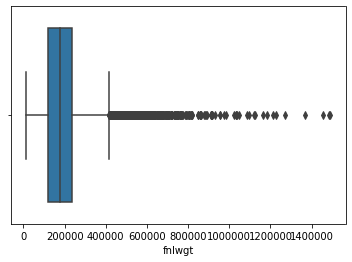

In [47]:
sns.boxplot(data['fnlwgt'])

In [48]:
data['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [49]:
q1_fn = data['fnlwgt'].describe()['25%']

In [50]:
q3_fn = data['fnlwgt'].describe()['75%']

In [51]:
iqr_fn = q3_fn-q1_fn

In [52]:
ub_fn = q3_fn+(1.5*iqr_fn)

In [53]:
out_fn = data[data['fnlwgt'] > ub_fn]['fnlwgt']

In [54]:
out_fn

37       544091.0
40       507875.0
80       446839.0
110      432376.0
157      494223.0
           ...   
16117    427515.0
16174    607658.0
16180    422933.0
16261    430340.0
16273    440129.0
Name: fnlwgt, Length: 1453, dtype: float64

In [55]:
# replacing outliers with 95 percentile value
f={}
f = f.fromkeys(out_fn,ub_fn)

In [56]:
data['fnlwgt'].replace(f,inplace=True)

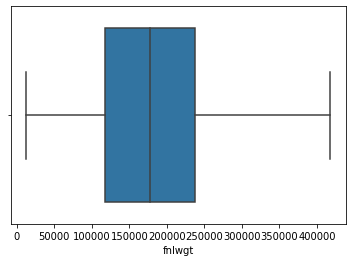

In [57]:
sns.boxplot(data['fnlwgt'])

In [58]:
data['fnlwgt'].describe()

count     48842.000000
mean     186770.707163
std       95328.614282
min       12285.000000
25%      117550.500000
50%      178144.500000
75%      237642.000000
max      417779.250000
Name: fnlwgt, dtype: float64

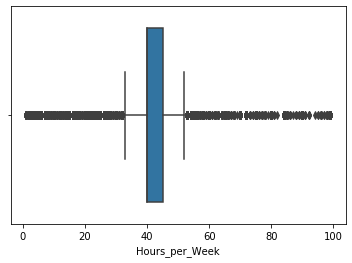

In [59]:
sns.boxplot(data['Hours_per_Week'])

In [60]:
data['Hours_per_Week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_Week, dtype: float64

In [61]:
q1_hr = data['Hours_per_Week'].describe()['25%']

In [62]:
q3_hr = data['Hours_per_Week'].describe()['75%']

In [63]:
iqr_hr = q3_hr-q1_hr

In [64]:
lb_hr = q1_hr-(1.5*iqr_hr)

In [65]:
ub_hr = q3_hr+(1.5*iqr_hr)

In [66]:
low_out_hr = data[data['Hours_per_Week'] < lb_hr]['Hours_per_Week']

In [67]:
up_out_hr = data[data['Hours_per_Week'] > ub_hr]['Hours_per_Week']

In [68]:
l={}
l = l.fromkeys(low_out_hr,lb_hr)

In [69]:
u={}
u = u.fromkeys(up_out_hr,ub_hr)

In [70]:
data['Hours_per_Week'].replace(l,inplace=True)
data['Hours_per_Week'].replace(u,inplace=True)

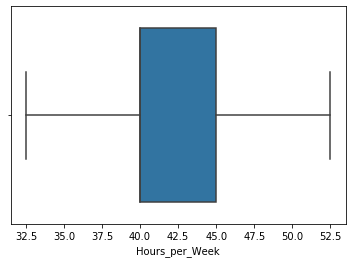

In [71]:
sns.boxplot(data['Hours_per_Week'])

In [72]:
data['Hours_per_Week'].describe()

count    48842.000000
mean        41.192805
std          6.184799
min         32.500000
25%         40.000000
50%         40.000000
75%         45.000000
max         52.500000
Name: Hours_per_Week, dtype: float64

Done with handling with outiers, we now analyse our data using some visualisations and perform some statistical analysis

## Analysis

## Univariate Analysis

In [73]:
data.head()

,Age,Work_class,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income,new
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K,1
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,1
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,1
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,1


##### Numerical 

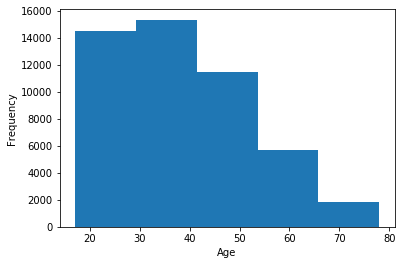

In [74]:
plt.hist(data['Age'],bins=5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can observe that majority of Adults are middle aged i.e, b/w 30-40 

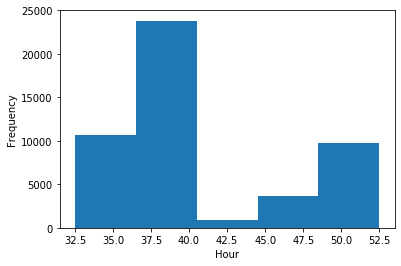

In [75]:
plt.hist(data['Hours_per_Week'],bins=5)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

We can observe that most of the adults work b/w 36 hrs to 40.5 hrs

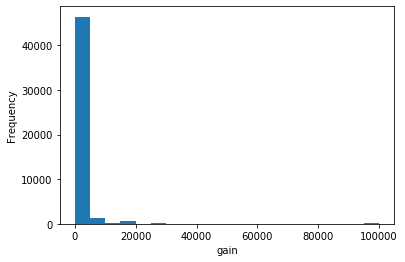

In [76]:
plt.hist(data['Capital_gain'],bins=20)
plt.xlabel('gain')
plt.ylabel('Frequency')
plt.show()

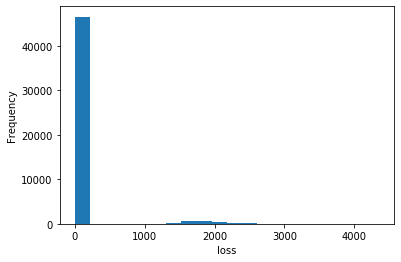

In [77]:
plt.hist(data['Capital_loss'],bins=20)
plt.xlabel('loss')
plt.ylabel('Frequency')
plt.show()

Majority of Adults dont have either of Capital gain or loss

##### Categorical

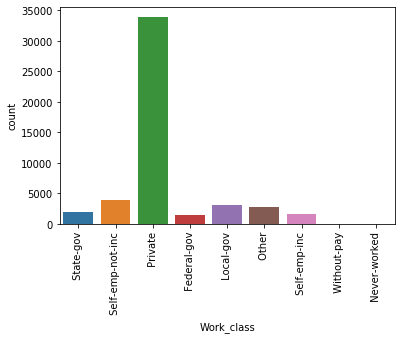

In [78]:
sns.countplot(data['Work_class'])
plt.xticks(rotation=90)
plt.show()

Here we can observe that Adults working in Private sector are on high.

Since there are negligible count in 'Without-pay' and 'Never-worked'. We can combine them both.

In [79]:
data['Work_class'].replace(' Without-pay',' Never-worked',inplace=True)

In [80]:
data['Work_class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Other', ' Self-emp-inc', ' Never-worked'],
      dtype=object)

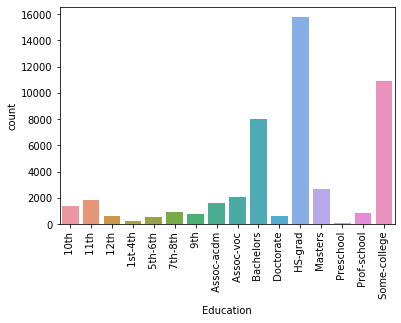

In [81]:
sns.countplot(data['Education'].sort_values())
plt.xticks(rotation=90)
plt.show()

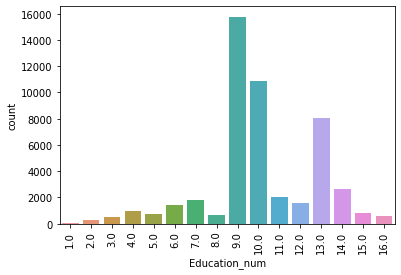

In [82]:
sns.countplot(data['Education_num'].sort_values())
plt.xticks(rotation=90)
plt.show()

In [83]:
data['Education'].value_counts(),data['Education_num'].value_counts()

( HS-grad         15784
  Some-college    10878
  Bachelors        8025
  Masters          2657
  Assoc-voc        2061
  11th             1812
  Assoc-acdm       1601
  10th             1389
  7th-8th           955
  Prof-school       834
  9th               756
  12th              657
  Doctorate         594
  5th-6th           509
  1st-4th           247
  Preschool          83
 Name: Education, dtype: int64,
 9.0     15784
 10.0    10878
 13.0     8025
 14.0     2657
 11.0     2061
 7.0      1812
 12.0     1601
 6.0      1389
 4.0       955
 15.0      834
 5.0       756
 8.0       657
 16.0      594
 3.0       509
 2.0       247
 1.0        83
 Name: Education_num, dtype: int64)

We can observe that Education and Education_num both represents the same. So we can reside Education_num and drop Education, as we need numerical content of the data.

In [84]:
data.drop('Education',axis=1,inplace=True)

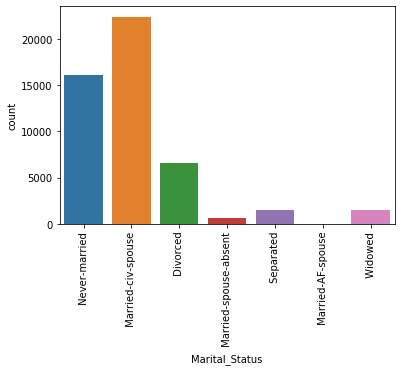

In [85]:
sns.countplot(data['Marital_Status'])
plt.xticks(rotation=90)
plt.show()

We can observe that Adults with marital status 'Married-civ-spouse' are on high

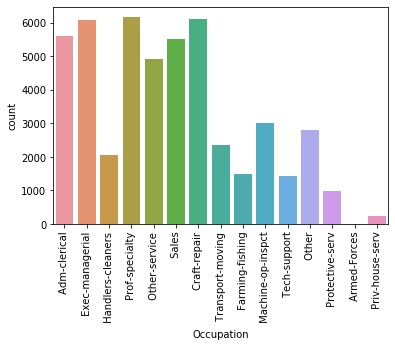

In [86]:
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)
plt.show()

We Observe that majority of adults have their Occupation as Prof-specialty

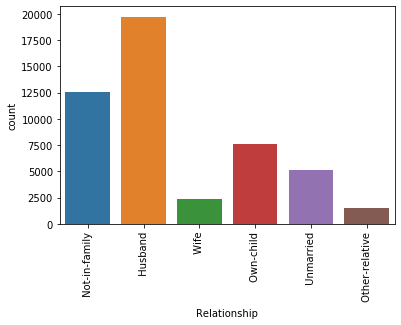

In [87]:
sns.countplot(data['Relationship'])
plt.xticks(rotation=90)
plt.show()

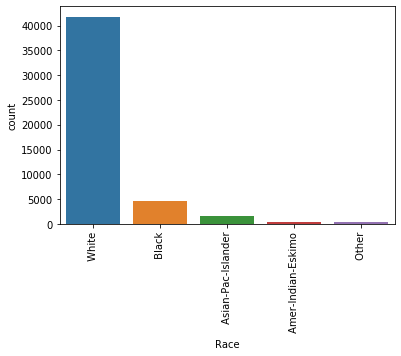

In [88]:
sns.countplot(data['Race'])
plt.xticks(rotation=90)
plt.show()

Here we can observe that, other than white and black race, rest of the races are less in count. So we can sum them together as Other

In [89]:
data['Race'].replace([' Asian-Pac-Islander',' Amer-Indian-Eskimo'],' Other',inplace=True)

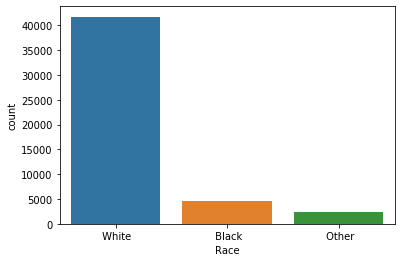

In [90]:
sns.countplot(data['Race'])
plt.show()

We Observe that there are more Whites

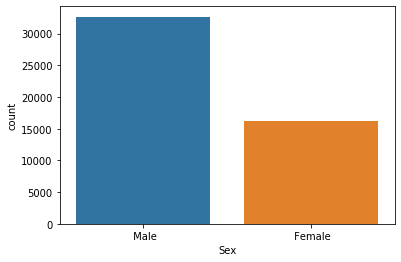

In [91]:
sns.countplot(data['Sex'])
plt.show()

We can see that majority of the Adults are of Male

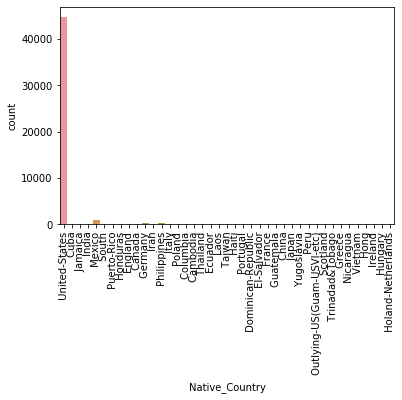

In [92]:
sns.countplot(data['Native_Country'])
plt.xticks(rotation=90)
plt.show()

Since other countries are having negligible count when compared to United States, we categorize those all as one category Other

In [93]:
data['Native_Country'] = [' United-States' if native==' United-States' else ' Other' for native in data['Native_Country']]

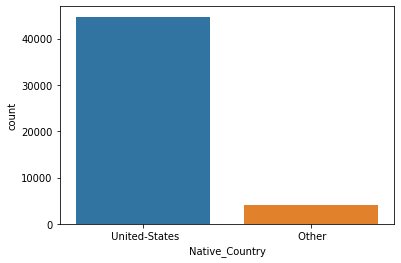

In [94]:
sns.countplot(data['Native_Country'])
plt.show()

We observe that Majority of Adults are from United States

In [95]:
data['Census_Income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [96]:
#replacing values of income which are in different form
data['Census_Income'].replace([' <=50K.', ' >50K.'],[' <=50K', ' >50K'],inplace=True)

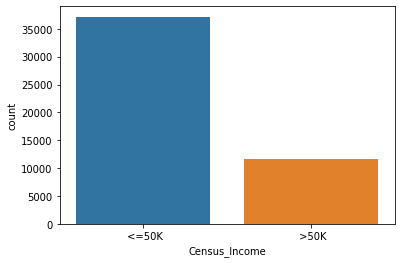

In [97]:
sns.countplot(data['Census_Income'])
plt.show()

## Bi-variate analysis

In [98]:
data.head()

,Age,Work_class,fnlwgt,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income,new
0,39.0,State-gov,77516.0,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,83311.0,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K,1
2,38.0,Private,215646.0,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,1
3,53.0,Private,234721.0,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,1
4,28.0,Private,338409.0,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Other,<=50K,1


Now we Extract relation b/w Census_income wrt other variables

In [99]:
# Income wrt Work place
in_wp = pd.crosstab(data['Work_class'],data['Census_Income'])

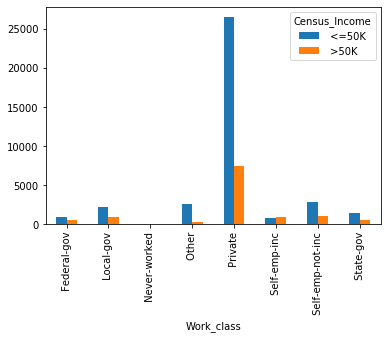

In [100]:
in_wp.plot(kind='bar')

We can observe that, most of the Adults are in private sector and have income <=50K

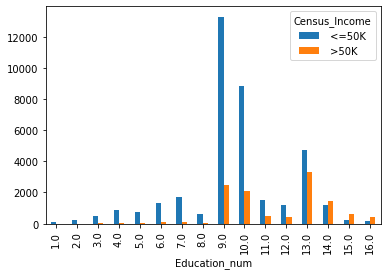

In [101]:
edu_num_inc = pd.crosstab(data['Education_num'],data['Census_Income'])
edu_num_inc.plot(kind='bar')

We can observe that Adults with 9th category of Education_num(HS-grad) are high in number and earns income of <=50K followed by 10th category of Education_num(Some-college).

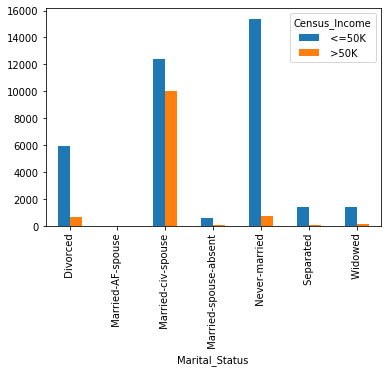

In [102]:
mar_inc = pd.crosstab(data['Marital_Status'],data['Census_Income'])
mar_inc.plot(kind='bar')
plt.show()

We can observe that adults who are unmarried are more in earning <=50K and Adults who are married-civ-spouse are second highest in earning <=50K and Highest in number earning >50K.



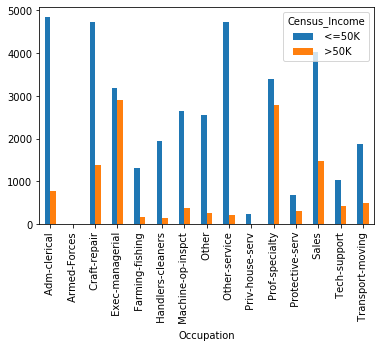

In [103]:
occ_inc = pd.crosstab(data['Occupation'],data['Census_Income'])
occ_inc.plot(kind='bar')
plt.show()


Adults with Occupation Exec-managerial and Prof-specialty are almost same in earning highest of income >50K.

Adults with Occupation Adm-clerical, Craft-repair, Other-service are almost same and high in number earning income of <=50K.

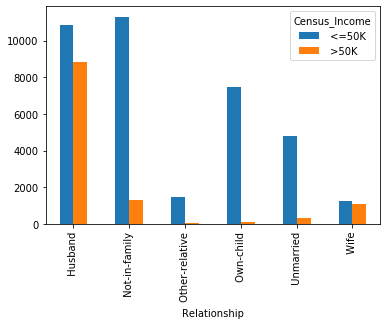

In [104]:
rel_inc = pd.crosstab(data['Relationship'],data['Census_Income'])
rel_inc.plot(kind='bar')
plt.show()

Adults who are not-in-family are more in number earning <=50K followed by Adults having relationship Husband.

Adults having relationship husband are high in earning income>50K compared to adults having other relationships.

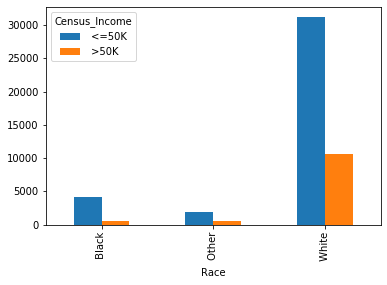

In [105]:
race_inc = pd.crosstab(data['Race'],data['Census_Income'])
race_inc.plot(kind='bar')
plt.show()

Since this is US based census, Whites are more in number earning <=50K and >50K compared to other raced people.

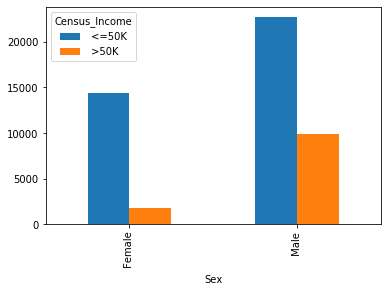

In [106]:
sex_inc = pd.crosstab(data['Sex'],data['Census_Income'])
sex_inc.plot(kind='bar')
plt.show()

We can observe that Male are more in number earning <=50K and >50K compared to female.

There are very less female earning >50K.

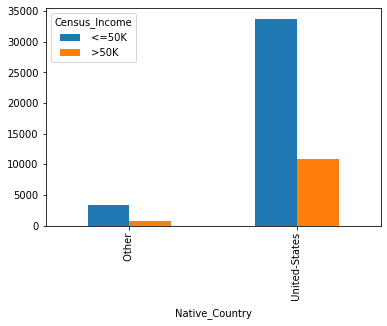

In [107]:
con_inc = pd.crosstab(data['Native_Country'],data['Census_Income'])
con_inc.plot(kind='bar')
plt.show()

As expected, there are more Adults who are native of United States earning more both <=50K and >50K comparec to others.

In [108]:
inc_gp = data.groupby('Census_Income')

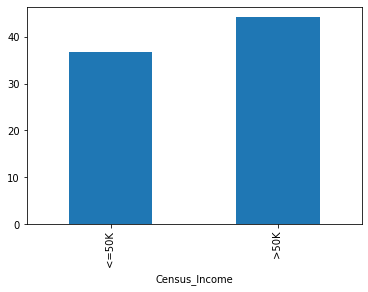

In [109]:
inc_gp.agg('mean')['Age'].plot(kind='bar')
plt.show()

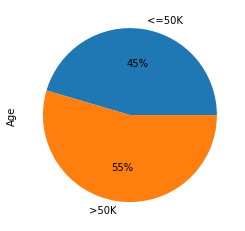

In [110]:
inc_gp.agg('mean')['Age'].plot(kind='pie',autopct='%.0f%%')
plt.show()

In [111]:
inc_gp.agg('mean')['Age']

Census_Income
 <=50K    36.845404
 >50K     44.255754
Name: Age, dtype: float64

We can observe that, Adults with avg age of 37yrs are having anuual income of <=50K i.e, around 45% of total Adults, and 
Adults with avg age of 44yrs are having annual income of >50K i.e, around 55%.

We can conclude that Adults earning <=50K are Young when compared to Adults earning >50K, which shows, income increases with age, because they gain experience.

In [112]:
inc_gp.agg('mean')['Hours_per_Week']

Census_Income
 <=50K    40.255376
 >50K     44.173056
Name: Hours_per_Week, dtype: float64

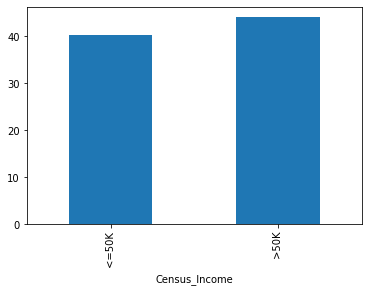

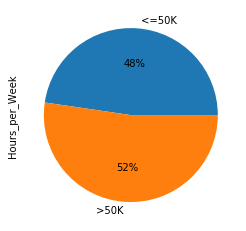

In [113]:
inc_gp.agg('mean')['Hours_per_Week'].plot(kind='bar')
plt.show()


inc_gp.agg('mean')['Hours_per_Week'].plot(kind='pie',autopct='%.0f%%')
plt.show()

We can observe that 48% of Adults who are working on avg of 40hrs per week are earning <=50K.

52% of Adults are having annual income of >50K who are working for 44hrs per week.

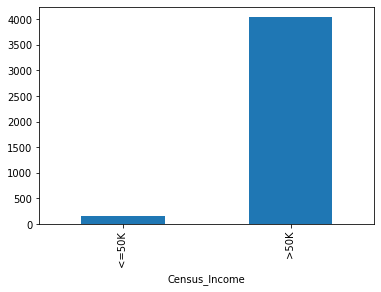

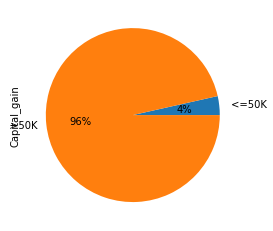

In [114]:
inc_gp = data.groupby('Census_Income')


inc_gp.agg('mean')['Capital_gain'].plot(kind='bar')
plt.show()

inc_gp.agg('mean')['Capital_gain'].plot(kind='pie',autopct='%.0f%%')
plt.show()

In [115]:
inc_gp.agg('mean')['Capital_gain']

Census_Income
 <=50K     147.010308
 >50K     4042.239497
Name: Capital_gain, dtype: float64

We can observe that avg capital gain for Income >50k is more of 4042USD and 147USD for Income <=50k

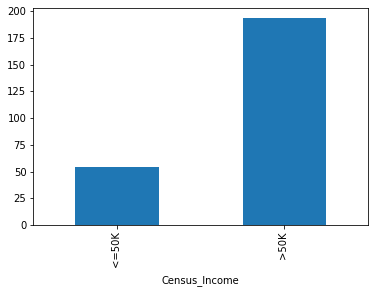

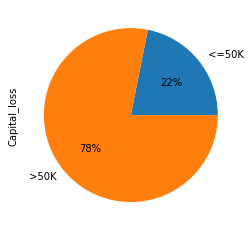

In [116]:
inc_gp = data.groupby('Census_Income')

inc_gp.agg('mean')['Capital_loss'].plot(kind='bar')
plt.show()

inc_gp.agg('mean')['Capital_loss'].plot(kind='pie',autopct='%.0f%%')
plt.show()

In [117]:
inc_gp.agg('mean')['Capital_loss']

Census_Income
 <=50K     54.151931
 >50K     193.528964
Name: Capital_loss, dtype: float64

 We can observe that Capital loss for Income >50k is 78% which is 193 USD and loss for Income <=50k is 22% which is 54 USD            

In [118]:
inc_gp.agg('mean')['fnlwgt']

Census_Income
 <=50K    187025.839490
 >50K     185959.597245
Name: fnlwgt, dtype: float64

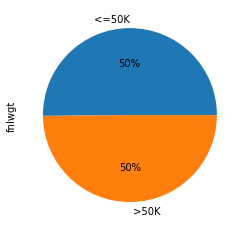

In [119]:
inc_gp.agg('mean')['fnlwgt'].plot(kind='pie',autopct='%.0f%%')
plt.show()

We can observe that final weight(fnlwgt) is same in both the cases of <=50K and >50K. We cant extract any info from this. So we can drop this column.

In [120]:
data.drop('fnlwgt',axis=1,inplace=True)

After all Analysis our Final dataset is as follows:

In [121]:
data

,Age,Work_class,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income,new
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K,1
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,1
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,1
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Other,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39.0,Private,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K,0
16278,64.0,Other,9.0,Widowed,Other,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K,0
16279,38.0,Private,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,0
16280,44.0,Private,13.0,Divorced,Adm-clerical,Own-child,Other,Male,5455.0,0.0,40.0,United-States,<=50K,0


## Hypothesis Testing:
    - Hypothesis is an assumption about parameter in a population.
    - We need to prove that assumptions proved for sample are same for population

# Chi Square test
    Used to get relation between two categorical data
    
    By default chi square test null hypothesis always assumes that there is no relation b/w two categorical variables
    
    Since we have a categorical variable as our target, we check relation of categorical target with other categorical variables

In [122]:
data.head(2)

,Age,Work_class,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Native_Country,Census_Income,new
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,1
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K,1


### Census_Income - Work_class

Null Hypothesis(Ho): There is no relation b/w Income and Work class of the adult
    
Alternate Hypothesis(H1): There is Relation b/w Income and Work class of the adult

In [123]:
sample = data.sample(n=500)

In [124]:
observed_values = pd.crosstab(sample['Census_Income'],sample['Work_class'])

In [125]:
observed_values.values

array([[ 11,  30,  32, 267,   7,  29,  13],
       [  5,   7,   2,  70,  12,  10,   5]], dtype=int64)

In [126]:
chi_cal,p,dof,expected_values=s.chi2_contingency(observed_values)

In [127]:
expected_values

array([[ 12.448,  28.786,  26.452, 262.186,  14.782,  30.342,  14.004],
       [  3.552,   8.214,   7.548,  74.814,   4.218,   8.658,   3.996]])

In [128]:
chi_cal,p,dof

(25.674920399623474, 0.00025592157150710026, 6)

In [129]:
# For 95% of Confidence interval significance level alpha is 0.05
# For alpha 0.05 and dof 5, we can get tabular chi square value
chi_tab=11.07
alpha=0.05

In [130]:
if chi_cal > chi_tab:
    print('Reject Null Hypothesis. There is relation b/w Income and Work class of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Work class of the adult')

Reject Null Hypothesis. There is relation b/w Income and Work class of the adult


In [131]:
if p <= alpha:
    print('Reject Null Hypothesis. There is relation b/w Income and Work class of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Work class of the adult')

Reject Null Hypothesis. There is relation b/w Income and Work class of the adult


Observation:

    We significantly proved that there is relation b/w Income and Work class of the adult

### Census_Income - Education

Null Hypothesis(Ho): There is no relation b/w Income and Education of the adult
    
Alternate Hypothesis(H1): There is Relation b/w Income and Education of the adult

In [132]:
sample = data.sample(n=500)

In [133]:
observed_values = pd.crosstab(sample['Census_Income'],sample['Education_num'])

In [134]:
observed_values.values

array([[  2,   8,  12,   8,   6,  18,   8, 123,  94,  11,   9,  50,  13,
          3,   0],
       [  0,   0,   1,   2,   1,   1,   2,  31,  25,   8,   2,  37,  14,
          7,   4]], dtype=int64)

In [135]:
chi_cal,p,dof,expected_values=s.chi2_contingency(observed_values)

In [136]:
expected_values

array([[  1.46,   5.84,   9.49,   7.3 ,   5.11,  13.87,   7.3 , 112.42,
         86.87,  13.87,   8.03,  63.51,  19.71,   7.3 ,   2.92],
       [  0.54,   2.16,   3.51,   2.7 ,   1.89,   5.13,   2.7 ,  41.58,
         32.13,   5.13,   2.97,  23.49,   7.29,   2.7 ,   1.08]])

In [137]:
chi_cal,p,dof

(59.5724060819823, 1.3941007454720203e-07, 14)

In [138]:
# For 95% of Confidence interval significance level alpha is 0.05
# For alpha 0.05 and dof 14, we can get tabular chi square value
chi_tab=23.68
alpha=0.05

In [139]:
if chi_cal > chi_tab:
    print('Reject Null Hypothesis. There is relation b/w Income and Education of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Education of the adult')

Reject Null Hypothesis. There is relation b/w Income and Education of the adult


In [140]:
if p <= alpha:
    print('Reject Null Hypothesis. There is relation b/w Income and Education of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Education of the adult')

Reject Null Hypothesis. There is relation b/w Income and Education of the adult


Observation:

    We significantly proved that there is relation b/w Income and Education of the adult

### Census_Income - Marital status

Null Hypothesis(Ho): There is no relation b/w Income and Marital status of the adult
    
Alternate Hypothesis(H1): There is Relation b/w Income and Marital status of the adult

In [141]:
sample = data.sample(n=500)

In [142]:
observed_values = pd.crosstab(sample['Census_Income'],sample['Marital_Status'])

In [143]:
observed_values.values

array([[ 64, 128,   5, 150,  19,  18],
       [  6,  99,   0,   9,   1,   1]], dtype=int64)

In [144]:
chi_cal,p,dof,expected_values=s.chi2_contingency(observed_values)

In [145]:
expected_values

array([[ 53.76 , 174.336,   3.84 , 122.112,  15.36 ,  14.592],
       [ 16.24 ,  52.664,   1.16 ,  36.888,   4.64 ,   4.408]])

In [146]:
chi_cal,p,dof

(97.6032838835855, 1.6904826715697109e-19, 5)

In [147]:
# For 95% of Confidence interval significance level alpha is 0.05
# For alpha 0.05 and dof 5, we can get tabular chi square value
chi_tab=11.07
alpha=0.05

In [148]:
if chi_cal > chi_tab:
    print('Reject Null Hypothesis. There is relation b/w Income and Marital status of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Marital status of the adult')

Reject Null Hypothesis. There is relation b/w Income and Marital status of the adult


In [149]:
if p <= alpha:
    print('Reject Null Hypothesis. There is relation b/w Income and Marital status of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Marital status of the adult')

Reject Null Hypothesis. There is relation b/w Income and Marital status of the adult


Observation:

    We significantly proved that there is relation b/w Income and Marital status of the adult

### Census_Income - Occupation

Null Hypothesis(Ho): There is no relation b/w Income and Occupation of the adult
    
Alternate Hypothesis(H1): There is Relation b/w Income and Occupation of the adult

In [150]:
sample = data.sample(n=500)

In [151]:
observed_values = pd.crosstab(sample['Census_Income'],sample['Occupation'])

In [152]:
observed_values.values

array([[66, 41, 24,  8, 14, 27, 26, 47,  1, 39,  8, 42, 11, 22],
       [ 9, 11, 23,  5,  1,  3,  5,  3,  0, 40,  1, 17,  0,  6]],
      dtype=int64)

In [153]:
chi_cal,p,dof,expected_values=s.chi2_contingency(observed_values)

In [154]:
expected_values

array([[56.4  , 39.104, 35.344,  9.776, 11.28 , 22.56 , 23.312, 37.6  ,
         0.752, 59.408,  6.768, 44.368,  8.272, 21.056],
       [18.6  , 12.896, 11.656,  3.224,  3.72 ,  7.44 ,  7.688, 12.4  ,
         0.248, 19.592,  2.232, 14.632,  2.728,  6.944]])

In [155]:
chi_cal,p,dof

(73.64625765184908, 1.6996243520354683e-10, 13)

In [156]:
# For 95% of Confidence interval significance level alpha is 0.05
# For alpha 0.05 and dof 12, we can get tabular chi square value
chi_tab=21.03
alpha=0.05

In [157]:
if chi_cal > chi_tab:
    print('Reject Null Hypothesis. There is relation b/w Income and Marital status of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Marital status of the adult')

Reject Null Hypothesis. There is relation b/w Income and Marital status of the adult


In [158]:
if p <= alpha:
    print('Reject Null Hypothesis. There is relation b/w Income and Marital status of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Marital status of the adult')

Reject Null Hypothesis. There is relation b/w Income and Marital status of the adult


Observation:

    We significantly proved that there is relation b/w Income and Occupation of the adult

### Census_Income - Relationship

Null Hypothesis(Ho): There is no relation b/w Income and Relationship of the adult
    
Alternate Hypothesis(H1): There is Relation b/w Income and Relationship of the adult

In [159]:
sample = data.sample(n=500)

In [160]:
observed_values = pd.crosstab(sample['Census_Income'],sample['Relationship'])

In [161]:
observed_values.values

array([[121, 114,  13,  73,  45,  10],
       [ 90,  11,   2,   3,   4,  14]], dtype=int64)

In [162]:
chi_cal,p,dof,expected_values=s.chi2_contingency(observed_values)

In [163]:
expected_values

array([[158.672,  94.   ,  11.28 ,  57.152,  36.848,  18.048],
       [ 52.328,  31.   ,   3.72 ,  18.848,  12.152,   5.952]])

In [164]:
chi_cal,p,dof

(93.74415853759261, 1.0971662385058343e-18, 5)

In [165]:
# For 95% of Confidence interval significance level alpha is 0.05
# For alpha 0.05 and dof 5, we can get tabular chi square value
chi_tab=11.07
alpha=0.05

In [166]:
if chi_cal > chi_tab:
    print('Reject Null Hypothesis. There is relation b/w Income and Relationship of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Relationship of the adult')

Reject Null Hypothesis. There is relation b/w Income and Relationship of the adult


In [167]:
if p <= alpha:
    print('Reject Null Hypothesis. There is relation b/w Income and Relationship of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Relationship of the adult')

Reject Null Hypothesis. There is relation b/w Income and Relationship of the adult


Observation:

    We significantly proved that there is relation b/w Income and Relationship of the adult

### Census_Income - Race

Null Hypothesis(Ho): There is no relation b/w Income and Race of the adult
    
Alternate Hypothesis(H1): There is Relation b/w Income and Race of the adult

In [168]:
sample = data.sample(n=500)

In [169]:
observed_values = pd.crosstab(sample['Census_Income'],sample['Race'])

In [170]:
observed_values.values

array([[ 37,  22, 323],
       [  5,   4, 109]], dtype=int64)

In [171]:
chi_cal,p,dof,expected_values=s.chi2_contingency(observed_values)

In [172]:
expected_values

array([[ 32.088,  19.864, 330.048],
       [  9.912,   6.136, 101.952]])

In [173]:
chi_cal,p,dof

(4.797106694457835, 0.09084928564117652, 2)

In [174]:
# For 95% of Confidence interval significance level alpha is 0.05
# For alpha 0.05 and dof 2, we can get tabular chi square value
chi_tab=5.99
alpha=0.05

In [175]:
if chi_cal > chi_tab:
    print('Reject Null Hypothesis. There is relation b/w Income and Race of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Race of the adult')

Accept Null Hypothesis. There is no relation b/w Income and Race of the adult


In [176]:
if p <= alpha:
    print('Reject Null Hypothesis. There is relation b/w Income and Race of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Race of the adult')

Accept Null Hypothesis. There is no relation b/w Income and Race of the adult


Observation:

    We significantly proved that there is relation b/w Income and Race of the adult

### Census_Income - Sex

Null Hypothesis(Ho): There is no relation b/w Income and Sex of the adult
    
Alternate Hypothesis(H1): There is Relation b/w Income and Sex of the adult

In [177]:
sample = data.sample(n=500)

In [178]:
observed_values = pd.crosstab(sample['Census_Income'],sample['Sex'])

In [179]:
observed_values.values

array([[144, 227],
       [ 24, 105]], dtype=int64)

In [180]:
chi_cal,p,dof,expected_values=s.chi2_contingency(observed_values)

In [181]:
expected_values

array([[124.656, 246.344],
       [ 43.344,  85.656]])

In [182]:
chi_cal,p,dof

(16.628199209005096, 4.546992785155486e-05, 1)

In [183]:
# For 95% of Confidence interval significance level alpha is 0.05
# For alpha 0.05 and dof 1, we can get tabular chi square value
chi_tab=3.84
alpha=0.05

In [184]:
if chi_cal > chi_tab:
    print('Reject Null Hypothesis. There is relation b/w Income and Sex of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Sex of the adult')

Reject Null Hypothesis. There is relation b/w Income and Sex of the adult


In [185]:
if p <= alpha:
    print('Reject Null Hypothesis. There is relation b/w Income and Sex of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Sex of the adult')

Reject Null Hypothesis. There is relation b/w Income and Sex of the adult


Observation:

    We significantly proved that there is relation b/w Income and Sex of the adult

### Census_Income - Native country

Null Hypothesis(Ho): There is no relation b/w Income and Native country of the adult
    
Alternate Hypothesis(H1): There is Relation b/w Income and Native country of the adult

In [204]:
sample = data.sample(n=500)

In [205]:
observed_values = pd.crosstab(sample['Census_Income'],sample['Native_Country'])

In [206]:
observed_values.values

array([[ 31, 350],
       [ 16, 103]], dtype=int64)

In [207]:
chi_cal,p,dof,expected_values=s.chi2_contingency(observed_values)

In [208]:
expected_values

array([[ 35.814, 345.186],
       [ 11.186, 107.814]])

In [209]:
chi_cal,p,dof

(2.4099181777115617, 0.12056866782414817, 1)

In [210]:
# For 95% of Confidence interval significance level alpha is 0.05
# For alpha 0.05 and dof 1, we can get tabular chi square value
chi_tab=3.84
alpha=0.05

In [211]:
if chi_cal > chi_tab:
    print('Reject Null Hypothesis. There is relation b/w Income and Native country of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Native country of the adult')

Accept Null Hypothesis. There is no relation b/w Income and Native country of the adult


In [212]:
if p <= alpha:
    print('Reject Null Hypothesis. There is relation b/w Income and Native country of the adult')
else:
    print('Accept Null Hypothesis. There is no relation b/w Income and Native country of the adult')

Accept Null Hypothesis. There is no relation b/w Income and Native country of the adult


Observation:

    We significantly proved that there is no relation b/w Income and Native country of the adult

###### Summary of Observations:
    
    Categorical variables, Work class, Education, Marital status, Occupation, Relationship, Race, Sex have relation with the target variable Census Income.
    
    Native country of the adult has no relation with Census Income. So, we can drop that column.

In [213]:
data.drop('Native_Country',axis=1,inplace=True)

In [214]:
data.head()

,Age,Work_class,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week,Census_Income,new
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,<=50K,1
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,<=50K,1
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,<=50K,1
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,<=50K,1
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,<=50K,1


## Split Our Data to independent,dependent variables and train,test 


    We have combined the train and test data at starting of our project with a demarkation of 0 and 1 to differentiate them. Now we split them and remove the column new.

In [215]:
train = data[data['new'] == 1]

In [216]:
test = data[data['new'] == 0]

In [217]:
train.drop('new',axis=1,inplace=True)
test.drop('new',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [218]:
y_train=train['Census_Income']

In [219]:
y_test=test['Census_Income']

In [220]:
X_train=train.drop('Census_Income',axis=1)

In [221]:
X_test=test.drop('Census_Income',axis=1)

## Encoding categorical data into numerical data

In [222]:
# encoding features using dummies and dropping first value to reduce no. of features
x_train= pd.get_dummies(X_train)
x_train.head()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_Week,Work_class_ Federal-gov,Work_class_ Local-gov,Work_class_ Never-worked,Work_class_ Other,Work_class_ Private,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,39.0,13.0,2174.0,0.0,40.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,50.0,13.0,0.0,0.0,32.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38.0,9.0,0.0,0.0,40.0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
3,53.0,7.0,0.0,0.0,40.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,28.0,13.0,0.0,0.0,40.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0


In [223]:
x_test= pd.get_dummies(X_test)
x_test.head()

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_Week,Work_class_ Federal-gov,Work_class_ Local-gov,Work_class_ Never-worked,Work_class_ Other,Work_class_ Private,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
1,25.0,7.0,0.0,0.0,40.0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,38.0,9.0,0.0,0.0,50.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,28.0,12.0,0.0,0.0,40.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,44.0,10.0,7688.0,0.0,40.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5,18.0,10.0,0.0,0.0,32.5,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0


And after encoding the categorical variables, we got features of 46 columns in train and test.

Since we are dealing with binary type of target, i.e, having 2 outcomes of <=50K or >50K, lets try with Logistic regression first.

## Feature Engineering

In [224]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
feat = featureScores.nlargest(10,'Score')
print(feat)
l=[]
for i in feat['Specs']:
    l.append(i)
print('\n\n',l)

                                 Specs         Score
2                         Capital_gain  8.219247e+07
3                         Capital_loss  1.372146e+06
0                                  Age  8.633633e+03
15  Marital_Status_ Married-civ-spouse  3.477516e+03
35               Relationship_ Husband  3.114942e+03
1                        Education_num  2.401422e+03
4                       Hours_per_Week  2.222484e+03
17       Marital_Status_ Never-married  2.218522e+03
38             Relationship_ Own-child  1.435873e+03
23         Occupation_ Exec-managerial  1.315483e+03


 ['Capital_gain', 'Capital_loss', 'Age', 'Marital_Status_ Married-civ-spouse', 'Relationship_ Husband', 'Education_num', 'Hours_per_Week', 'Marital_Status_ Never-married', 'Relationship_ Own-child', 'Occupation_ Exec-managerial']


In [225]:
sel_train = x_train[l]

In [226]:
sel_test = x_test[l]

In [228]:
sel_train

,Capital_gain,Capital_loss,Age,Marital_Status_ Married-civ-spouse,Relationship_ Husband,Education_num,Hours_per_Week,Marital_Status_ Never-married,Relationship_ Own-child,Occupation_ Exec-managerial
0,2174.0,0.0,39.0,0,0,13.0,40.0,1,0,0
1,0.0,0.0,50.0,1,1,13.0,32.5,0,0,1
2,0.0,0.0,38.0,0,0,9.0,40.0,0,0,0
3,0.0,0.0,53.0,1,1,7.0,40.0,0,0,0
4,0.0,0.0,28.0,1,0,13.0,40.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,27.0,1,0,12.0,38.0,0,0,0
32557,0.0,0.0,40.0,1,1,9.0,40.0,0,0,0
32558,0.0,0.0,58.0,0,0,9.0,40.0,0,0,0
32559,0.0,0.0,22.0,0,0,9.0,32.5,1,1,0


In [229]:
sel_test

,Capital_gain,Capital_loss,Age,Marital_Status_ Married-civ-spouse,Relationship_ Husband,Education_num,Hours_per_Week,Marital_Status_ Never-married,Relationship_ Own-child,Occupation_ Exec-managerial
1,0.0,0.0,25.0,0,0,7.0,40.0,1,1,0
2,0.0,0.0,38.0,1,1,9.0,50.0,0,0,0
3,0.0,0.0,28.0,1,1,12.0,40.0,0,0,0
4,7688.0,0.0,44.0,1,1,10.0,40.0,0,0,0
5,0.0,0.0,18.0,0,0,10.0,32.5,1,1,0
...,...,...,...,...,...,...,...,...,...,...
16277,0.0,0.0,39.0,0,0,13.0,36.0,0,0,0
16278,0.0,0.0,64.0,0,0,9.0,40.0,0,0,0
16279,0.0,0.0,38.0,1,1,13.0,50.0,0,0,0
16280,5455.0,0.0,44.0,0,0,13.0,40.0,0,1,0


## Scaling Features
    Scaling is getting data in one range.
    
    Algorithms which calculate slope, distance, and deals with Gradient Descent need to be scaled.

In [230]:
# import Scaling library
from sklearn.preprocessing import StandardScaler

In [231]:
sc = StandardScaler()

In [232]:
# scaling x_train,x_test
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
sel_train = sc.fit_transform(sel_train)
sel_test = sc.fit_transform(sel_test)

## Building Logistic regression

In [233]:
# importing libraries that are reqired for logistic regression
from sklearn.linear_model import LogisticRegression

In [236]:
lr_model = LogisticRegression()
lr_sel = LogisticRegression()

In [238]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [239]:
lr_sel.fit(sel_train,y_train)

LogisticRegression()

In [240]:
# Predicting
y_pred = lr_model.predict(x_test)

In [243]:
y_sel_pred = lr_sel.predict(sel_test)

## Evaluation

In [241]:
from sklearn.metrics import accuracy_score

In [247]:
print('Test accuracy for logistic regression:',accuracy_score(y_test,y_pred)*100,'%')
print('Test accuracy for selected logistic regression:',accuracy_score(y_test,y_sel_pred)*100,'%')

Test accuracy for logistic regression: 85.33873840673178 %
Test accuracy for selected logistic regression: 84.50340888151834 %


So we got accuracy of 85.3%, which is a good result for thw whole data and

84.5 accuracy for data of selected features

Lets try other classification algorithms, and test whether we can get better accuracy from any of them.

## Building decision classifer,random forest classifier,Ada Boost,GBM,XG Boost

In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [248]:
# Decision tree classifier for whole data
dt = DecisionTreeClassifier(criterion='entropy',random_state=32)

dt.fit(x_train,y_train)

# predicting using decision tree model
y_dt  = dt.predict(x_test)
train_pred = dt.predict(x_train)

print('Test accuracy of Decision tree:',accuracy_score(y_test,y_dt)*100,'%')
print('Train accuracy of Decision tree:',accuracy_score(y_train,train_pred)*100,'%')


# for selected features
dt_sel = DecisionTreeClassifier(criterion='entropy',random_state=32)

dt_sel.fit(sel_train,y_train)

# predicting using decision tree model
y_sel_dt  = dt_sel.predict(sel_test)
train_pred_sel = dt_sel.predict(sel_train)

print('\n\nTest accuracy of selected Decision tree:',accuracy_score(y_test,y_sel_dt)*100,'%')
print('Train accuracy of selected Decision tree:',accuracy_score(y_train,train_pred_sel)*100,'%')

Test accuracy of Decision tree: 82.04041520791107 %
Train accuracy of Decision tree: 97.15917815791897 %


Test accuracy of selected Decision tree: 83.0600085989804 %
Train accuracy of selected Decision tree: 91.63416356991493 %


In [249]:
# Random forest classifier
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(x_train,y_train)

# predicting using random forest model
y_rf  = rf.predict(x_test)
train_rf  = rf.predict(x_train)

print('Test accuracy of Random forest:',accuracy_score(y_test,y_rf)*100,'%')
print('Train accuracy of Random forest:',accuracy_score(y_train,train_rf)*100,'%')


# for selected features
rf_sel = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)

rf_sel.fit(sel_train,y_train)

# predicting using random forest model
y_sel_rf  = rf_sel.predict(sel_test)
train_pred_sel = rf_sel.predict(sel_train)

print('\n\nTest accuracy of selected Random forest:',accuracy_score(y_test,y_sel_rf)*100,'%')
print('Train accuracy of selected Random forest:',accuracy_score(y_train,train_pred_sel)*100,'%')

Test accuracy of Random forest: 84.53411952582766 %
Train accuracy of Random forest: 97.15917815791897 %


Test accuracy of selected Random forest: 83.7847798046803 %
Train accuracy of selected Random forest: 91.63416356991493 %


In [251]:
# ada boost classifier
ada = AdaBoostClassifier(n_estimators=100,random_state=21,learning_rate=0.3)
ada.fit(x_train,y_train)

# predicting using ada boost model
y_ada  = ada.predict(x_test)
train_ada  = ada.predict(x_train)

print('Test accuracy of Ada Boost:',accuracy_score(y_test,y_ada)*100,'%')
print('Train accuracy of Ada Boost:',accuracy_score(y_train,train_ada)*100,'%')


# for selected features
ada_sel = AdaBoostClassifier(n_estimators=100,random_state=21,learning_rate=0.3)
ada_sel.fit(sel_train,y_train)

# predicting using ada boost model
y_ada_sel  = ada_sel.predict(sel_test)
train_ada_sel  = ada_sel.predict(sel_train)

print('\n\nTest accuracy of selected Ada Boost:',accuracy_score(y_test,y_ada_sel)*100,'%')
print('Train accuracy of selected Ada Boost:',accuracy_score(y_train,train_ada_sel)*100,'%')

Test accuracy of Ada Boost: 86.0573674835698 %
Train accuracy of Ada Boost: 85.90645250452997 %


Test accuracy of selected Ada Boost: 85.48000737055463 %
Train accuracy of selected Ada Boost: 85.56862504222843 %


In [252]:
# gbm classifier
gbm = GradientBoostingClassifier(n_estimators=100,random_state=42,learning_rate=0.2)
gbm.fit(x_train,y_train)

# predicting using gbm forest model
y_gbm  = gbm.predict(x_test)
train_gbm  = gbm.predict(x_train)

print('Test accuracy of GBM:',accuracy_score(y_test,y_gbm)*100,'%')
print('Train accuracy of GBM:',accuracy_score(y_train,train_gbm)*100,'%')


# for selected features
gbm_sel = GradientBoostingClassifier(n_estimators=100,random_state=42,learning_rate=0.2)
gbm_sel.fit(sel_train,y_train)

# predicting using gradient boost model
y_gbm_sel  = gbm_sel.predict(sel_test)
train_gbm_sel  = gbm_sel.predict(sel_train)

print('\n\nTest accuracy of selected GBM:',accuracy_score(y_test,y_gbm_sel)*100,'%')
print('Train accuracy of selected GBM:',accuracy_score(y_train,train_gbm_sel)*100,'%')

Test accuracy of GBM: 87.37792518887046 %
Train accuracy of GBM: 87.62015908602315 %


Test accuracy of selected GBM: 86.36447392666298 %
Train accuracy of selected GBM: 86.87079635146341 %


In [254]:
# xg boost classifier
xgb = XGBClassifier(n_estimators=100,random_state=23,learning_rate=0.3)

xgb.fit(x_train,y_train)

# predicting using xgb model
y_xgb  = xgb.predict(x_test)
train_xgb  = xgb.predict(x_train)

print('Test accuracy of XG Boost:',accuracy_score(y_test,y_xgb)*100,'%')
print('Train accuracy of XG Boost:',accuracy_score(y_train,train_xgb)*100,'%')


# for selected features
xgb_sel = XGBClassifier(n_estimators=100,random_state=23,learning_rate=0.3)

xgb_sel.fit(sel_train,y_train)

# predicting using xgb model
y_xgb_sel  = xgb_sel.predict(sel_test)
train_xgb_sel  = xgb_sel.predict(sel_train)

print('\n\nTest accuracy of selected XG Boost:',accuracy_score(y_test,y_xgb_sel)*100,'%')
print('Train accuracy of selected XG Boost:',accuracy_score(y_train,train_xgb_sel)*100,'%')

Test accuracy of XG Boost: 87.3042196425281 %
Train accuracy of XG Boost: 89.10967107889806 %


Test accuracy of selected XG Boost: 86.09422025674098 %
Train accuracy of selected XG Boost: 87.69079573723165 %


In [255]:
# naive bayes
nb = GaussianNB()
nb.fit(x_train,y_train)

# predicting using navie bayes model
y_nb = nb.predict(x_test)
train_nb = nb.predict(x_train)

print('Test accuracy of Naive bayes:',accuracy_score(y_test,y_nb)*100,'%')
print('Train accuracy of Naive bayes:',accuracy_score(y_train,train_nb)*100,'%')


# naive bayes for selected features
nb_sel = GaussianNB()
nb_sel.fit(sel_train,y_train)

# predicting using navie bayes model
y_nb_sel = nb_sel.predict(sel_test)
train_nb_sel = nb_sel.predict(sel_train)

print('\n\nTest accuracy of selected Naive bayes:',accuracy_score(y_test,y_nb_sel)*100,'%')
print('Train accuracy of selected Naive bayes:',accuracy_score(y_train,train_nb_sel)*100,'%')

Test accuracy of Naive bayes: 67.08433142927339 %
Train accuracy of Naive bayes: 67.38122293541353 %


Test accuracy of selected Naive bayes: 82.12640501197716 %
Train accuracy of selected Naive bayes: 82.3101256103928 %


In [256]:
# Evaluating model performance using K-fold cross validation score

from sklearn.model_selection import cross_val_score

'''
estimator--- instance of model
cv-- no.of folds 
scoring--- evaluation name-- by default--accuracy score
n_jobs--- parallel building of model
'''
cv_lr = cross_val_score(lr_model,x_train,y_train,cv=5,n_jobs=-1)
cv_dt = cross_val_score(dt,x_train,y_train,cv=5,n_jobs=-1)
cv_rf = cross_val_score(rf,x_train,y_train,cv=5,n_jobs=-1)
cv_ada = cross_val_score(ada,x_train,y_train,cv=5,n_jobs=-1)
cv_gbm = cross_val_score(gbm,x_train,y_train,cv=5,n_jobs=-1)
cv_xgb = cross_val_score(xgb,x_train,y_train,cv=5,n_jobs=-1)
cv_nb = cross_val_score(nb,x_train,y_train,cv=5,n_jobs=-1)

# final accuracy
print('Cross validation for Logistic regression:',np.mean(cv_lr)*100)
print('Cross validation for Decision tree:',np.mean(cv_dt)*100)
print('Cross validation for Random forest:',np.mean(cv_rf)*100)
print('Cross validation for Ada Boost:',np.mean(cv_ada)*100)
print('Cross validation for GBM:',np.mean(cv_gbm)*100)
print('Cross validation for XG Boost:',np.mean(cv_xgb)*100)
print('Cross validation for Naive bayes:',np.mean(cv_nb)*100)


# for selected features
cv_lr_sel = cross_val_score(lr_sel,sel_train,y_train,cv=5,n_jobs=-1)
cv_dt_sel = cross_val_score(dt_sel,sel_train,y_train,cv=5,n_jobs=-1)
cv_rf_sel = cross_val_score(rf_sel,sel_train,y_train,cv=5,n_jobs=-1)
cv_ada_sel = cross_val_score(ada_sel,sel_train,y_train,cv=5,n_jobs=-1)
cv_gbm_sel = cross_val_score(gbm_sel,sel_train,y_train,cv=5,n_jobs=-1)
cv_xgb_sel = cross_val_score(xgb_sel,sel_train,y_train,cv=5,n_jobs=-1)
cv_nb_sel = cross_val_score(nb_sel,sel_train,y_train,cv=5,n_jobs=-1)

# final accuracy
print('\n\nCross validation for selected Logistic regression:',np.mean(cv_lr_sel)*100)
print('Cross validation for selected Decision tree:',np.mean(cv_dt_sel)*100)
print('Cross validation for selected Random forest:',np.mean(cv_rf_sel)*100)
print('Cross validation for selected Ada Boost:',np.mean(cv_ada_sel)*100)
print('Cross validation for selected GBM:',np.mean(cv_gbm_sel)*100)
print('Cross validation for selected XG Boost:',np.mean(cv_xgb_sel)*100)
print('Cross validation for selected Naive bayes:',np.mean(cv_nb_sel)*100)

Cross validation for Logistic regression: 85.16017718862031
Cross validation for Decision tree: 82.16579173914504
Cross validation for Random forest: 84.84690230199213
Cross validation for Ada Boost: 85.81739893865642
Cross validation for GBM: 87.03051230745842
Cross validation for XG Boost: 87.1994227383449
Cross validation for Naive bayes: 64.06734018260963


Cross validation for selected Logistic regression: 84.42616373754099
Cross validation for selected Decision tree: 83.59695558797353
Cross validation for selected Random forest: 84.29102294371755
Cross validation for selected Ada Boost: 85.51335290107745
Cross validation for selected GBM: 86.48691418901
Cross validation for selected XG Boost: 86.46541777529802
Cross validation for selected Naive bayes: 82.25485807821137


###### So after Final evaluation, we can observe that XG Boost for whole data has good accuracy score of 87.19% compared to other classification Models and models of data with selected features.

###### We now use a tool Pycaret to know metrics of all Classification Algorithms

In [257]:
from pycaret.classification import *
exp_name = setup(data = train,  target = 'Census_Income')
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8724,0.9295,0.6579,0.7754,0.7117,0.6305,0.6341,13.2840
lightgbm,Light Gradient Boosting Machine,0.8718,0.9272,0.6601,0.7720,0.7116,0.6299,0.6331,0.1290
xgboost,Extreme Gradient Boosting,0.8698,0.9266,0.6625,0.7631,0.7091,0.6258,0.6285,1.2420
gbc,Gradient Boosting Classifier,0.8653,0.9209,0.6035,0.7843,0.6820,0.5983,0.6067,0.9070
ada,Ada Boost Classifier,0.8602,0.9157,0.6092,0.7599,0.6760,0.5883,0.5943,0.2730
lr,Logistic Regression,0.8520,0.9037,0.6044,0.7312,0.6616,0.5680,0.5723,2.2060
knn,K Neighbors Classifier,0.8504,0.8805,0.6544,0.7012,0.6769,0.5797,0.5804,1.4030
rf,Random Forest Classifier,0.8463,0.8912,0.6222,0.7021,0.6596,0.5608,0.5626,0.8290
lda,Linear Discriminant Analysis,0.8421,0.8943,0.5803,0.7083,0.6375,0.5379,0.5425,0.2400
ridge,Ridge Classifier,0.8395,0.0000,0.5174,0.7340,0.6067,0.5097,0.5222,0.0620


In [258]:
X_train.head()

,Age,Work_class,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_Week
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0


## CatBoost Classification

In [259]:
from catboost import CatBoostClassifier

In [260]:
cat_feat = ['Work_class','Marital_Status','Occupation','Relationship','Race','Sex']

In [261]:
cat = CatBoostClassifier(iterations=400,learning_rate=0.2,depth=3,random_seed=42)

In [262]:
cat.fit(X_train,y_train,eval_set=(X_test,y_test),cat_features=cat_feat,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5410576	test: 0.5403280	best: 0.5403280 (0)	total: 79ms	remaining: 31.5s
1:	learn: 0.4578667	test: 0.4563459	best: 0.4563459 (1)	total: 106ms	remaining: 21s
2:	learn: 0.4194635	test: 0.4171600	best: 0.4171600 (2)	total: 128ms	remaining: 16.9s
3:	learn: 0.3939257	test: 0.3924639	best: 0.3924639 (3)	total: 152ms	remaining: 15s
4:	learn: 0.3798423	test: 0.3786997	best: 0.3786997 (4)	total: 175ms	remaining: 13.8s
5:	learn: 0.3601296	test: 0.3594335	best: 0.3594335 (5)	total: 200ms	remaining: 13.2s
6:	learn: 0.3502892	test: 0.3488119	best: 0.3488119 (6)	total: 219ms	remaining: 12.3s
7:	learn: 0.3420889	test: 0.3406367	best: 0.3406367 (7)	total: 247ms	remaining: 12.1s
8:	learn: 0.3358263	test: 0.3341703	best: 0.3341703 (8)	total: 270ms	remaining: 11.7s
9:	learn: 0.3312496	test: 0.3295908	best: 0.3295908 (9)	total: 295ms	remaining: 11.5s
10:	learn: 0.3285987	test: 0.3272722	best: 0.3272722 (10)	total: 325ms	remaining: 11.5s
11:	learn: 0.3254996	test: 0.3238676	best: 0.3238676 (11)

95:	learn: 0.2826468	test: 0.2844944	best: 0.2844944 (95)	total: 2.89s	remaining: 9.15s
96:	learn: 0.2825808	test: 0.2844889	best: 0.2844889 (96)	total: 2.92s	remaining: 9.14s
97:	learn: 0.2821578	test: 0.2840568	best: 0.2840568 (97)	total: 2.96s	remaining: 9.12s
98:	learn: 0.2821264	test: 0.2840593	best: 0.2840568 (97)	total: 3s	remaining: 9.12s
99:	learn: 0.2819085	test: 0.2839314	best: 0.2839314 (99)	total: 3.03s	remaining: 9.09s
100:	learn: 0.2811763	test: 0.2831109	best: 0.2831109 (100)	total: 3.06s	remaining: 9.05s
101:	learn: 0.2811392	test: 0.2831212	best: 0.2831109 (100)	total: 3.09s	remaining: 9.02s
102:	learn: 0.2809225	test: 0.2829952	best: 0.2829952 (102)	total: 3.12s	remaining: 9s
103:	learn: 0.2808014	test: 0.2829666	best: 0.2829666 (103)	total: 3.15s	remaining: 8.98s
104:	learn: 0.2807771	test: 0.2829755	best: 0.2829666 (103)	total: 3.18s	remaining: 8.94s
105:	learn: 0.2806002	test: 0.2828744	best: 0.2828744 (105)	total: 3.21s	remaining: 8.89s
106:	learn: 0.2798912	test

191:	learn: 0.2727119	test: 0.2783883	best: 0.2783787 (190)	total: 5.79s	remaining: 6.27s
192:	learn: 0.2726432	test: 0.2784185	best: 0.2783787 (190)	total: 5.81s	remaining: 6.23s
193:	learn: 0.2726158	test: 0.2784126	best: 0.2783787 (190)	total: 5.85s	remaining: 6.21s
194:	learn: 0.2721881	test: 0.2779663	best: 0.2779663 (194)	total: 5.88s	remaining: 6.19s
195:	learn: 0.2720303	test: 0.2777878	best: 0.2777878 (195)	total: 5.94s	remaining: 6.18s
196:	learn: 0.2719165	test: 0.2777282	best: 0.2777282 (196)	total: 5.97s	remaining: 6.15s
197:	learn: 0.2716595	test: 0.2774577	best: 0.2774577 (197)	total: 6s	remaining: 6.12s
198:	learn: 0.2716524	test: 0.2774632	best: 0.2774577 (197)	total: 6.03s	remaining: 6.09s
199:	learn: 0.2716321	test: 0.2774558	best: 0.2774558 (199)	total: 6.06s	remaining: 6.06s
200:	learn: 0.2715464	test: 0.2774467	best: 0.2774467 (200)	total: 6.09s	remaining: 6.03s
201:	learn: 0.2715161	test: 0.2774330	best: 0.2774330 (201)	total: 6.13s	remaining: 6s
202:	learn: 0.27

288:	learn: 0.2679416	test: 0.2762188	best: 0.2761932 (285)	total: 8.89s	remaining: 3.42s
289:	learn: 0.2679021	test: 0.2761639	best: 0.2761639 (289)	total: 8.93s	remaining: 3.39s
290:	learn: 0.2678993	test: 0.2761564	best: 0.2761564 (290)	total: 8.98s	remaining: 3.36s
291:	learn: 0.2678903	test: 0.2761565	best: 0.2761564 (290)	total: 9.01s	remaining: 3.33s
292:	learn: 0.2678848	test: 0.2761615	best: 0.2761564 (290)	total: 9.03s	remaining: 3.3s
293:	learn: 0.2678781	test: 0.2761644	best: 0.2761564 (290)	total: 9.06s	remaining: 3.27s
294:	learn: 0.2678541	test: 0.2761714	best: 0.2761564 (290)	total: 9.09s	remaining: 3.24s
295:	learn: 0.2678412	test: 0.2761605	best: 0.2761564 (290)	total: 9.12s	remaining: 3.21s
296:	learn: 0.2678144	test: 0.2761620	best: 0.2761564 (290)	total: 9.15s	remaining: 3.17s
297:	learn: 0.2677700	test: 0.2761647	best: 0.2761564 (290)	total: 9.18s	remaining: 3.14s
298:	learn: 0.2677471	test: 0.2761534	best: 0.2761534 (298)	total: 9.22s	remaining: 3.12s
299:	learn:

380:	learn: 0.2654980	test: 0.2750260	best: 0.2750260 (380)	total: 11.9s	remaining: 596ms
381:	learn: 0.2654782	test: 0.2750371	best: 0.2750260 (380)	total: 12s	remaining: 564ms
382:	learn: 0.2654149	test: 0.2750478	best: 0.2750260 (380)	total: 12s	remaining: 533ms
383:	learn: 0.2653338	test: 0.2750989	best: 0.2750260 (380)	total: 12s	remaining: 501ms
384:	learn: 0.2653161	test: 0.2750971	best: 0.2750260 (380)	total: 12.1s	remaining: 471ms
385:	learn: 0.2651973	test: 0.2749768	best: 0.2749768 (385)	total: 12.1s	remaining: 439ms
386:	learn: 0.2651764	test: 0.2749704	best: 0.2749704 (386)	total: 12.1s	remaining: 408ms
387:	learn: 0.2650957	test: 0.2749221	best: 0.2749221 (387)	total: 12.2s	remaining: 377ms
388:	learn: 0.2650854	test: 0.2749143	best: 0.2749143 (388)	total: 12.2s	remaining: 345ms
389:	learn: 0.2650785	test: 0.2749114	best: 0.2749114 (389)	total: 12.2s	remaining: 314ms
390:	learn: 0.2650537	test: 0.2749127	best: 0.2749114 (389)	total: 12.3s	remaining: 282ms
391:	learn: 0.26

In [264]:
X_train.dtypes

Age               float64
Work_class         object
Education_num     float64
Marital_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain      float64
Capital_loss      float64
Hours_per_Week    float64
dtype: object

In [265]:
from sklearn.metrics import accuracy_score
test_pred = cat.predict(X_test)
train_pred = cat.predict(X_train)
print('Train score:',accuracy_score(y_train,train_pred)*100)
print('Test score:',accuracy_score(y_test,test_pred)*100)

Train score: 87.90270569085716
Test score: 87.41477796204164


###### We've got 87.4% of accuracy with CatBoost Classifier. We'll save this for future Deployment.

In [266]:
import joblib
joblib.dump(cat,'adult_income_catboost.pkl')

['adult_income_catboost.pkl']

###### Checking for feature importance for CatBoostClassifier

In [267]:
cat.feature_importances_

array([10.68657678,  1.33707968,  9.96022652,  2.31330674,  6.33154672,
       25.95255664,  0.54994138,  1.0000181 , 25.7649522 , 11.97061676,
        4.13317848])

In [268]:
X_train.columns

Index(['Age', 'Work_class', 'Education_num', 'Marital_Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_Week'],
      dtype='object')

In [269]:
feat = pd.DataFrame()
feat['Features'] = cat.feature_names_
feat['Imp_Scores'] = cat.feature_importances_
feat.sort_values('Imp_Scores',ascending = False)

,Features,Imp_Scores
5,Relationship,25.952557
8,Capital_gain,25.764952
9,Capital_loss,11.970617
0,Age,10.686577
2,Education_num,9.960227
4,Occupation,6.331547
10,Hours_per_Week,4.133178
3,Marital_Status,2.313307
1,Work_class,1.337080
7,Sex,1.000018


Here, we can observe that, our model has given highest importance to Relationship, Capital gain, Capital loss.

Annual income will show serious spikes when the status of relationship is not single(married),
It obviously does because expenses play huge role more than earnings , and due to the cultural practices, split sharing and 
sharing of everything is a practice in US that puts certain individual in a better position which turns out to be the top factor in 
this list.

Individuals having Capital gain and loss also impacts their Annual Income, because that was their profit or loss source irrespective of their income through job.

Age, Education, Occupation are other features that have got importance by our model which are obvious factors that affect Annual Income.